In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.integrate import cumtrapz
from scipy.fftpack import fft, ifft, fftfreq
from numpy import sin, cos, sqrt, exp, pi, hanning

In [53]:
# given an fft, plot the ampltiude spectrum
def plot_amplitude(fft, ax=None):
    frequencies = fftfreq(len(fft), 0.01)

    if ax != None:
        ax.stem(frequencies, np.abs(fft), 'b', markerfmt=" ", basefmt='-b')
        ax.set_xlim([0, 5]);
        ax.set_xlabel("Frequency (Hz)")
        ax.set_ylabel("Amplitude")
        ax.set_title(f"Amplitude vs. Frequency (samples={len(fft)})");
    else:
        plt.stem(frequencies, np.abs(fft), 'b', markerfmt=" ", basefmt='-b')
        plt.xlim([0, 5]);
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Amplitude")
        plt.title(f"Amplitude vs. Frequency (samples={len(fft)})");

# given an fft, returns the frequencies to use as the x-axis of amplitude spectrum
def get_frequencies(fft):
    N = len(fft)
    cycles = np.arange(N)
    T = N / 100
    frequencies = cycles / T
    return frequencies

# plots the amplitude of the fft of a sine wave with a given frequency and sampling rate
# returns the wave and its fft
def plot_sine_amp(interval=0.01, frequency=1, num_samples=300, ax=None):    
    t = np.arange(0, interval*num_samples, interval)
    wave = sin(2 * pi * frequency * t)

    fft_wave = fft(wave)

    plot_amplitude(fft_wave, ax)

    return (wave, fft_wave)

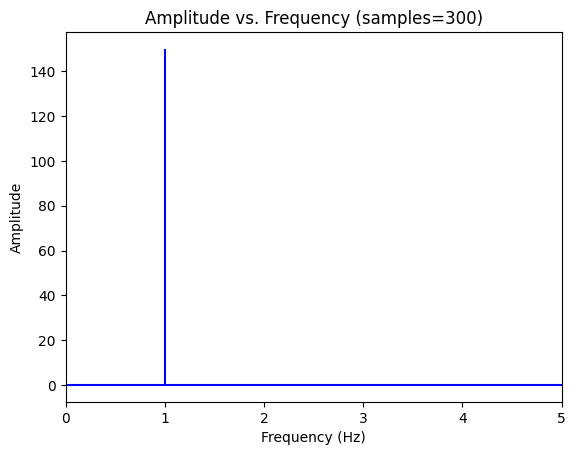

In [54]:
# 1i

wave_300, fft_300 = plot_sine_amp()

The amplitude spectrum of the first 275 samples looks different than the full 300 samples because it includes a partial wavelength. Because the sampling interval is 0.01, the amplitude spectrum will only have the perfect spike seen with the full 300 samples when the number of samples is a multiple of 100.


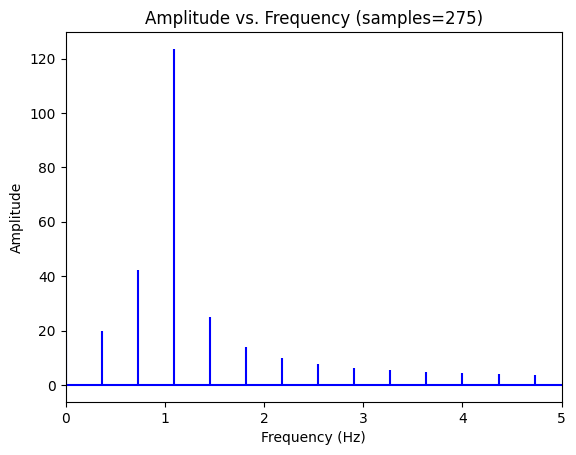

In [30]:
# 1ii

wave_275, fft_275 = plot_sine_amp(num_samples=275)

print("The amplitude spectrum of the first 275 samples looks different than the full 300 samples because it includes a partial wavelength. Because the sampling interval is 0.01, the amplitude spectrum will only have the perfect spike seen with the full 300 samples when the number of samples is a multiple of 100.")

This amplitude spectrum shows the noise that is introduced when the data is padded with zeros. We can see the expected spike at 1 Hz with repeating, smaller spikes on either side that get closer and closer to zero as the frequency gets farther away from 1 Hz.


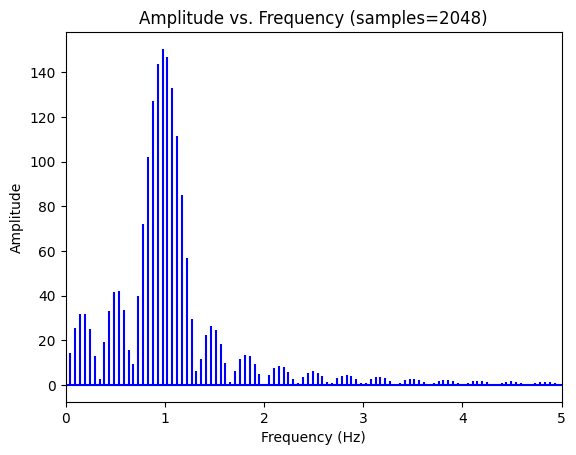

In [31]:
# 1iii

wave_300_padded = np.append(wave_300, np.zeros(1748))
fft_300_padded = fft(wave_300_padded)

plot_amplitude(fft_300_padded)

print("This amplitude spectrum shows the noise that is introduced when the data is padded with zeros. We can see the expected spike at 1 Hz with repeating, smaller spikes on either side that get closer and closer to zero as the frequency gets farther away from 1 Hz.")

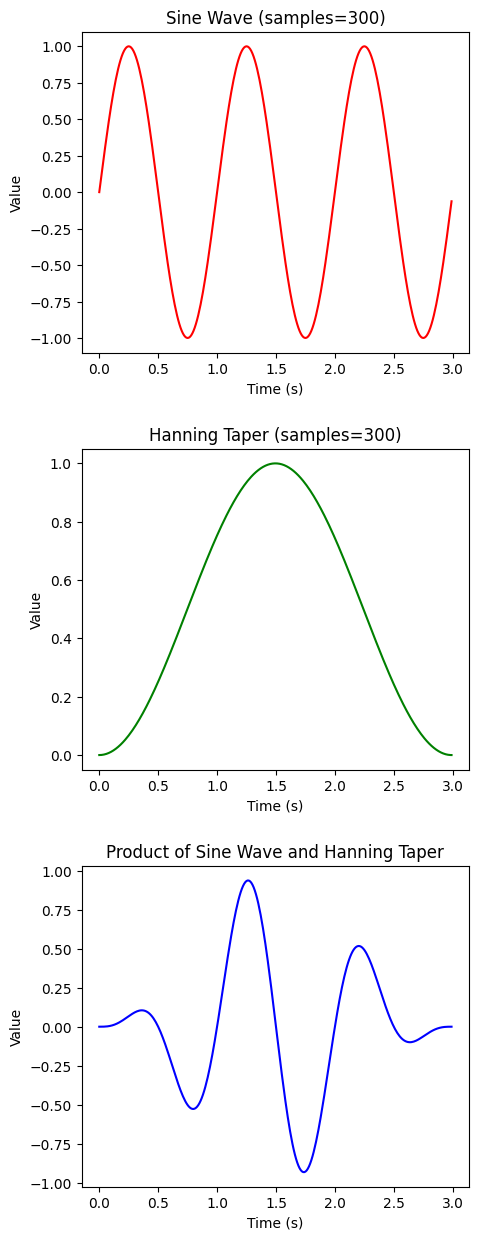

In [32]:
# 1iv

hanning_taper_300 = hann(300)
tapered_wave_300 = wave_300 * hanning_taper_300

fig, axes = plt.subplots(3, 1, figsize=(5, 15))

interval = 0.01
num_samples = 300
t = np.arange(0, interval*num_samples, interval)

axes[0].plot(t, wave_300, c='r')
axes[1].plot(t, hanning_taper_300, c='g')
axes[2].plot(t, wave_300 * hanning_taper_300, 'b');

axes[0].set_title("Sine Wave (samples=300)")
axes[1].set_title("Hanning Taper (samples=300)")
axes[2].set_title("Product of Sine Wave and Hanning Taper")

for ax in axes:
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Value");

plt.subplots_adjust(wspace=0.3, hspace=0.3)

The amplitude spectrum of the tapered sine wave is very similar to the untapered wave, but is noticeably different.
The tapered wave has two additional spikes on either side of 1 Hz, about half the height of the main spike at 1 Hz.


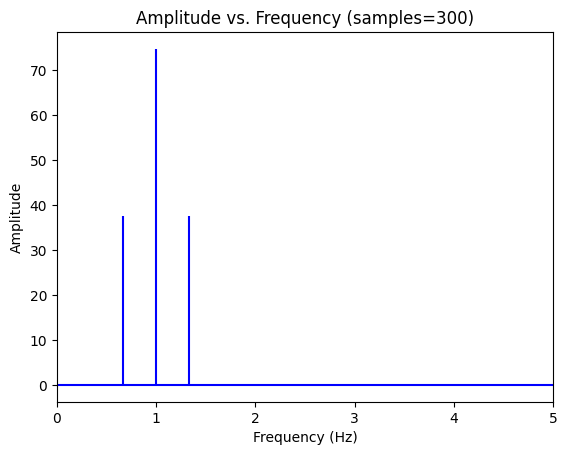

In [33]:
# 1v

plot_amplitude(fft(tapered_wave_300))
print("The amplitude spectrum of the tapered sine wave is very similar to the untapered wave, but is noticeably different.")
print("The tapered wave has two additional spikes on either side of 1 Hz, about half the height of the main spike at 1 Hz.")

The amplitude spectrum of the Hanning taper is a spike at about 0.33 Hz.
This leads to the tapered 300 sample having an amplitude spectrum that includes additional frequencies and has smaller amplitudes at those frequencies.


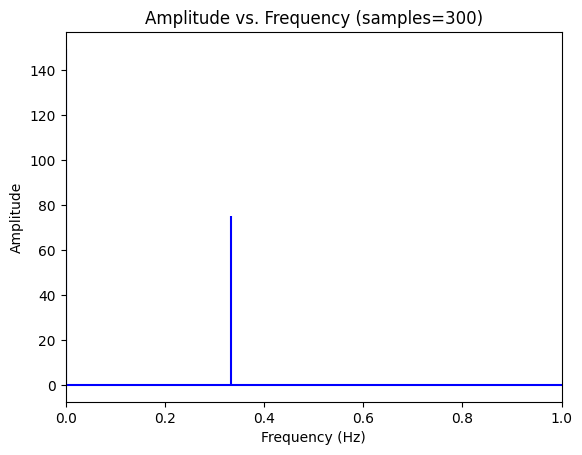

In [55]:
# 1vi

plot_amplitude(fft(hanning_taper_300))
plt.xlim([0, 1]);

print("The amplitude spectrum of the Hanning taper is a spike at about 0.33 Hz.")
print("This leads to the tapered 300 sample having an amplitude spectrum that includes additional frequencies and has smaller amplitudes at those frequencies.")


The tapered 275-sample wave has an amplitude spectrum that is less spread out. Compared to the untapered 275-sample wave, the tapered wave has less spikes that are larger in magnitude.


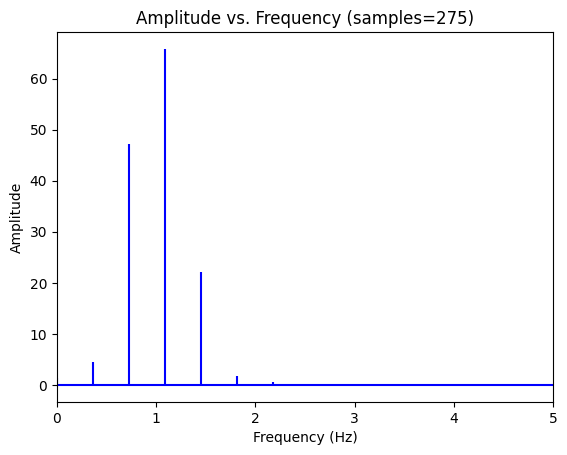

In [56]:
# 1vii

hanning_taper_275 = hanning(275)
tapered_wave_275 = hanning_taper_275 * wave_275

plot_amplitude(fft(tapered_wave_275))

print("The tapered 275-sample wave has an amplitude spectrum that is less spread out. Compared to the untapered 275-sample wave, the tapered wave has less spikes that are larger in magnitude.")

Tapering the wave before padding with zeros provides an amplitude spectrum that is much less spread out, with one major spike around 1 Hz. Other frequencies show up on the ampltiude spectrum but they are much smaller than with the untapered wave.


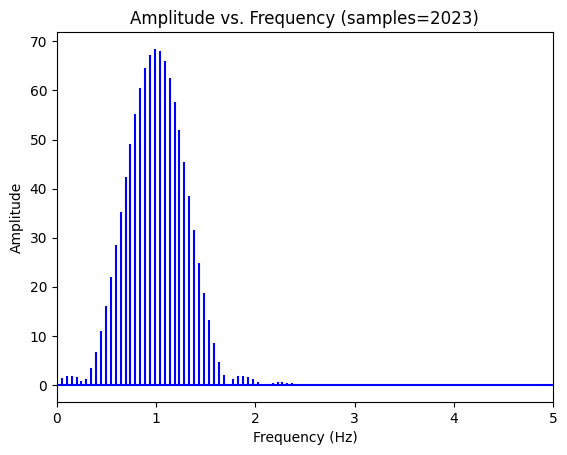

In [38]:
# 1viii

tapered_padded = np.append(tapered_wave_275, np.zeros(1748))
plot_amplitude(fft(tapered_padded))

print("Tapering the wave before padding with zeros provides an amplitude spectrum that is much less spread out, with one major spike around 1 Hz. Other frequencies show up on the ampltiude spectrum but they are much smaller than with the untapered wave.")

There is one primary spike in the ampltiude spectrum at a frequency of about 10^-1 Hz. This implies that the wave has a relatively long period corresponding to the low frequency.


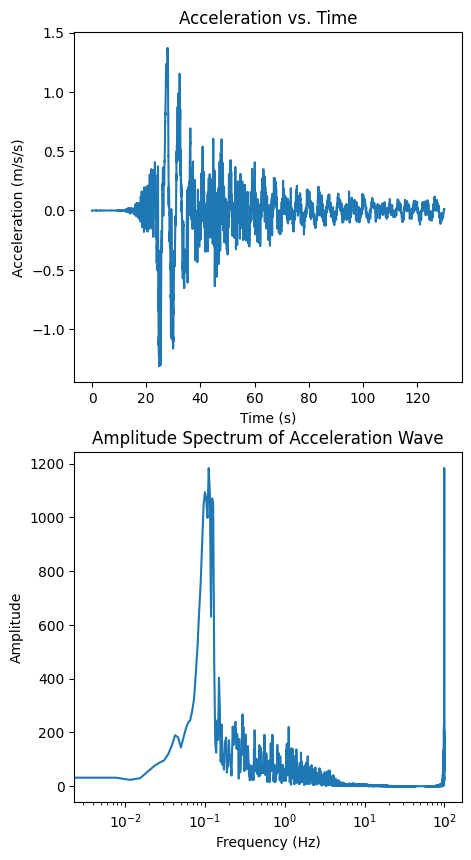

In [12]:
# 2i.

kathmandu = pd.read_csv("KATNP.accel.e.txt", sep=" ")
kathmandu = kathmandu.rename(columns={"time (s)": "time",
                          "accel (m/s/s)": "accel"})

fft_accel = fft(kathmandu.accel.values)
freq_accel = get_frequencies(fft_accel)

fig, axes = plt.subplots(2, 1, figsize=(5, 10))
axes[0].plot(kathmandu.time, kathmandu.accel)
axes[1].semilogx((freq_accel), np.abs(fft_accel));

axes[0].set_title("Acceleration vs. Time")
axes[0].set_xlabel("Time (s)")
axes[0].set_ylabel("Acceleration (m/s/s)")

axes[1].set_title("Amplitude Spectrum of Acceleration Wave")
axes[1].set_xlabel("Frequency (Hz)")
axes[1].set_ylabel("Amplitude")

print("There is one primary spike in the ampltiude spectrum at a frequency of about 10^-1 Hz. This implies that the wave has a relatively long period corresponding to the low frequency.")


Tapering the wave with a Hanning taper doesn't create any noticeable difference in the amplitude spectrum. There is still a primary peak at 10^-1 in both spectra and smaller spikes in higher frequencies ranging from 10^-1 to 10^1.


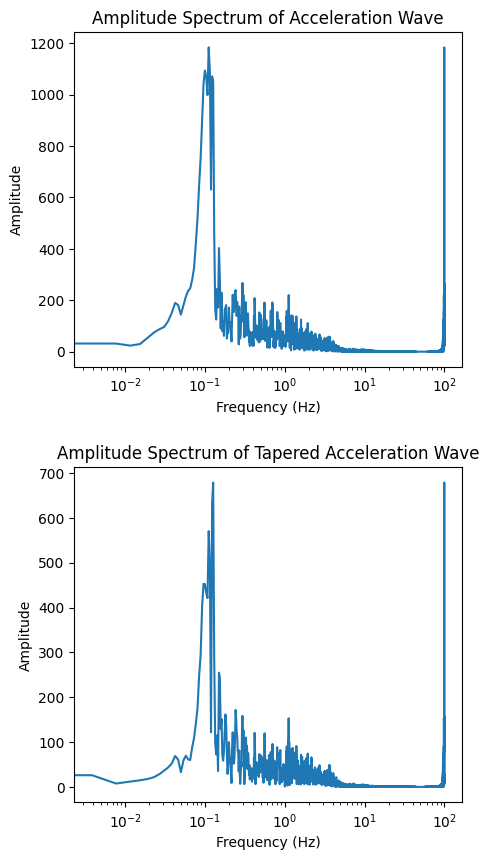

In [13]:
# 2ii

taper = hann(len(kathmandu.accel.values))
tapered_accel = kathmandu.accel.values * taper

fft_tapered = fft(tapered_accel)
freq_tapered = get_frequencies(fft_tapered)

fig, axes = plt.subplots(2, 1, figsize=(5, 10))

axes[0].semilogx(freq_accel, np.abs(fft_accel))
axes[0].set_title("Amplitude Spectrum of Acceleration Wave")
axes[0].set_xlabel("Frequency (Hz)")
axes[0].set_ylabel("Amplitude")

axes[1].semilogx(freq_tapered, np.abs(fft_tapered))
axes[1].set_title("Amplitude Spectrum of Tapered Acceleration Wave")
axes[1].set_xlabel("Frequency (Hz)")
axes[1].set_ylabel("Amplitude");

plt.subplots_adjust(wspace=0.3, hspace=0.3)

print("Tapering the wave with a Hanning taper doesn't create any noticeable difference in the amplitude spectrum. There is still a primary peak at 10^-1 in both spectra and smaller spikes in higher frequencies ranging from 10^-1 to 10^1.")

Text(0, 0.5, 'Integral')

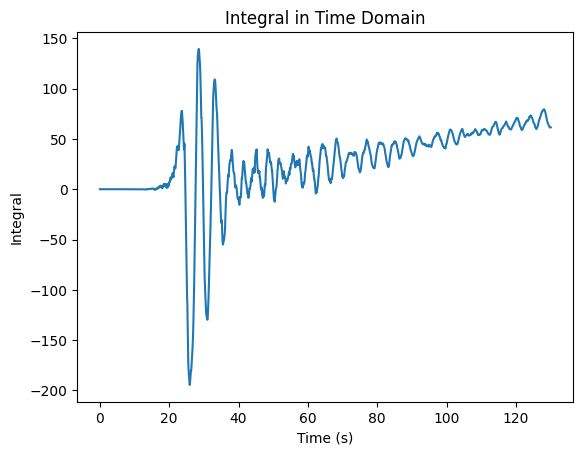

In [14]:
integral = cumtrapz(kathmandu.accel.values)
plt.plot(kathmandu.time[1:], integral)

plt.title("Integral in Time Domain")
plt.xlabel("Time (s)")
plt.ylabel("Integral")


/Users/danielreeder/anaconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


By the following graph, we can see that dividing in the frequency domain, then taking the inverse fft gives a very similar result to integrating in the time domain.
It appears that using this strategy may result in slightly 'smoothing out' the result, as well as having a much smaller magnitude. In the graph below, the integral in the time domain is scaled down by a factor of 200.


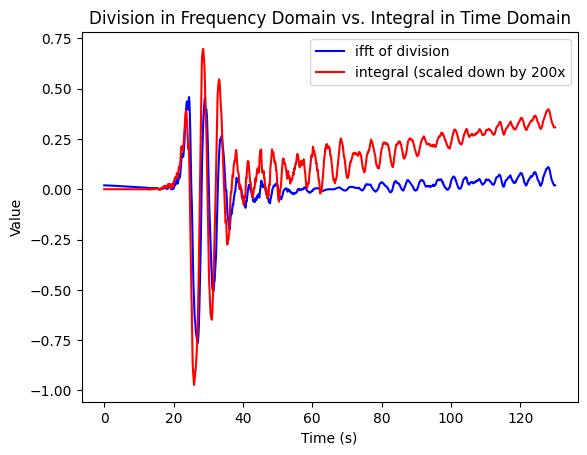

In [57]:
t = kathmandu.time.values
delta = t[1] - t[0]
freq = fftfreq(len(t), delta)

div = fft_accel[1:] / (2j * pi * freq[1:])

plt.plot(kathmandu.time[1:], ifft(div), 'b', label="ifft of division")
plt.plot(t[1:], integral/200, 'r', label="integral (scaled down by 200x")
plt.legend()
plt.title("Division in Frequency Domain vs. Integral in Time Domain")
plt.xlabel("Time (s)")
plt.ylabel("Value");

print("By the following graph, we can see that dividing in the frequency domain, then taking the inverse fft gives a very similar result to integrating in the time domain.")
print("It appears that using this strategy may result in slightly 'smoothing out' the result, as well as having a much smaller magnitude. In the graph below, the integral in the time domain is scaled down by a factor of 200.")